In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
import statsmodels.api as sm
import missingno as mso

In [2]:

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import SGDRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error



from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_validate

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv('insurance.csv')

# Data Exploration
    Someof the typical steps
    1. Dataset description
    2. Examine shape of feature matrix
    3. Examin shape of label
    4. Feature Names
    5. Examine sample training examples
    6. Examine Features
    7. Examine Targets
    8. Examine details of features and labels
    9. Feature and target histograms
    10. Feature and target statistics
    11. Pairplot bw features

In [4]:
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

### Description of Dataset

In [5]:
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [6]:
# Null values in Insurance Data Set
df.isnull().any()   

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

The dataset contains no missing values


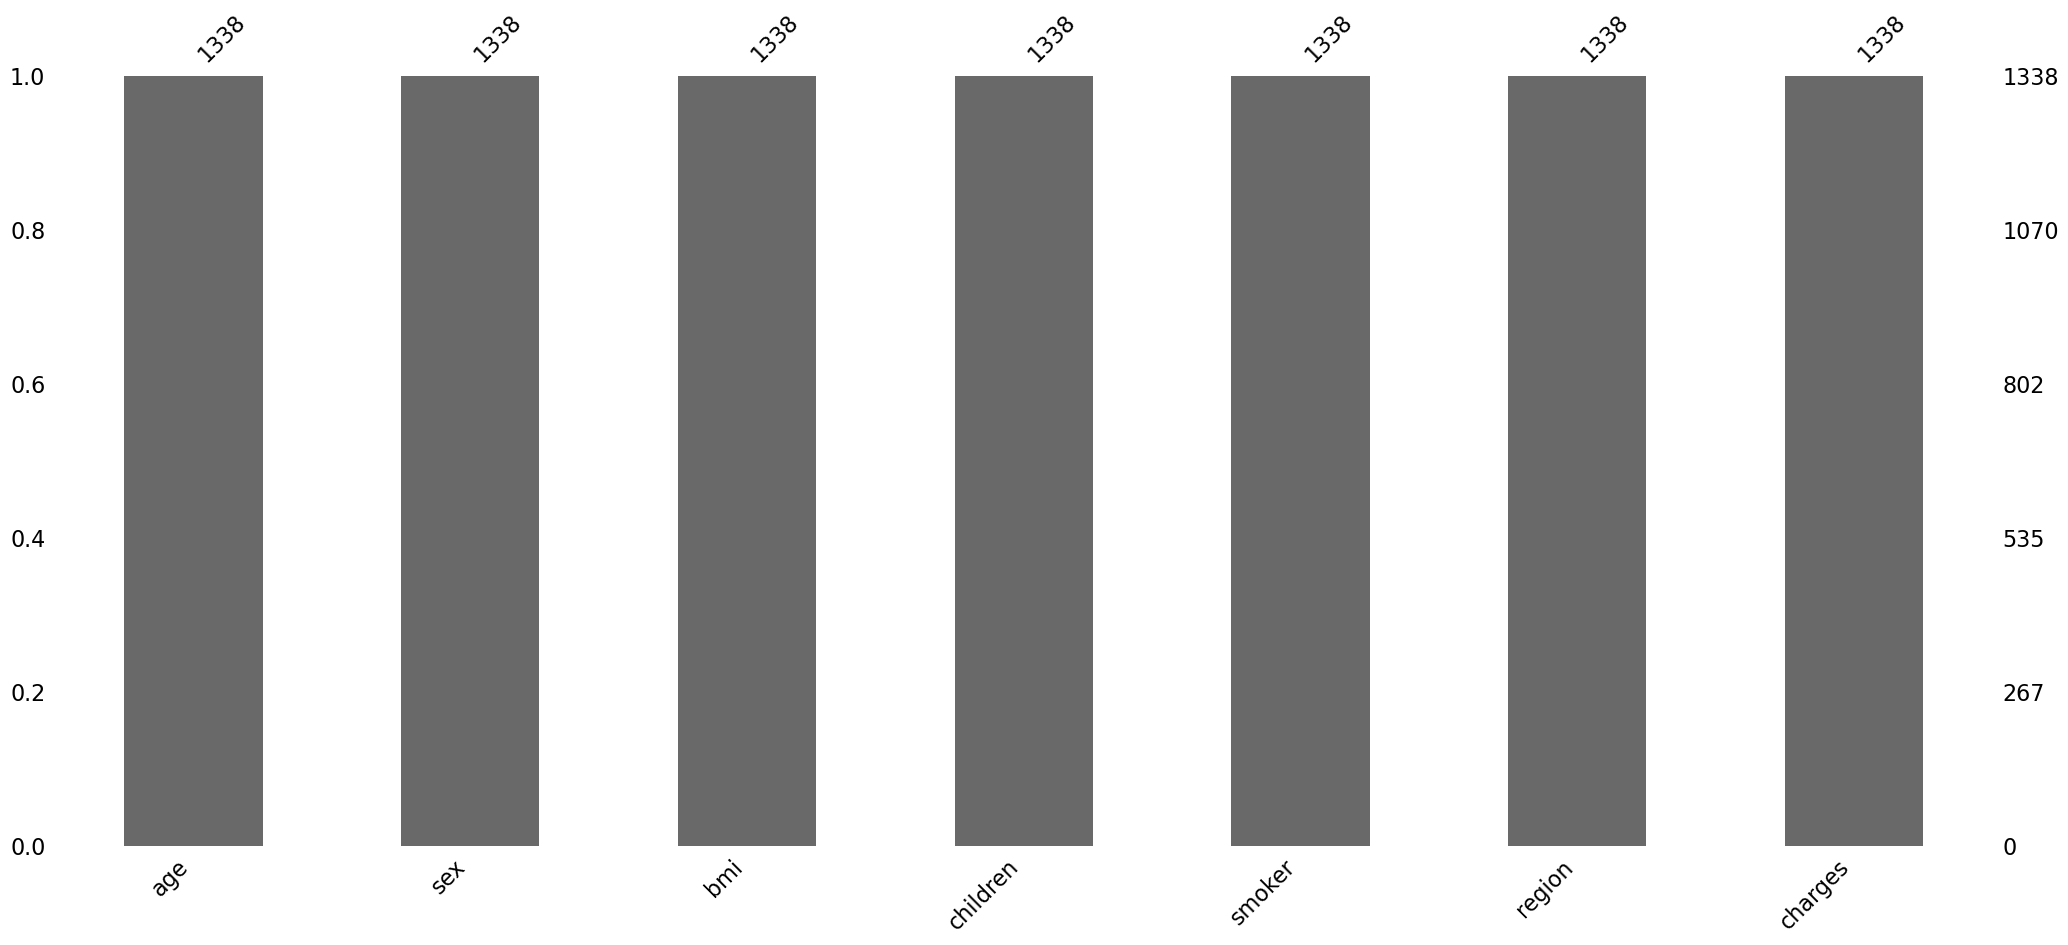

In [7]:

mso.bar(df);

### Deviding the data into features and labels

In [8]:
# Information about attributes data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [9]:
df1 = df.drop('charges',axis=1)

In [10]:
df1

age     sex     bmi  children smoker     region
0      19  female  27.900         0    yes  southwest
1      18    male  33.770         1     no  southeast
2      28    male  33.000         3     no  southeast
3      33    male  22.705         0     no  northwest
4      32    male  28.880         0     no  northwest
...   ...     ...     ...       ...    ...        ...
1333   50    male  30.970         3     no  northwest
1334   18  female  31.920         0     no  northeast
1335   18  female  36.850         0     no  southeast
1336   21  female  25.800         0     no  southwest
1337   61  female  29.070         0    yes  northwest

[1338 rows x 6 columns]

In [11]:
label = df['charges']

In [12]:
# feature.hist(figsize = (15,15), bins = 10, edgecolor= 'black')

# plt.subplots_adjust(hspace = 0.5, wspace = 0.4)

In [13]:
# label.hist(figsize = (3,3), bins = 10, edgecolor= 'black')
# plt.title('charges');

### Statistics

In [14]:
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

## Pairplots 

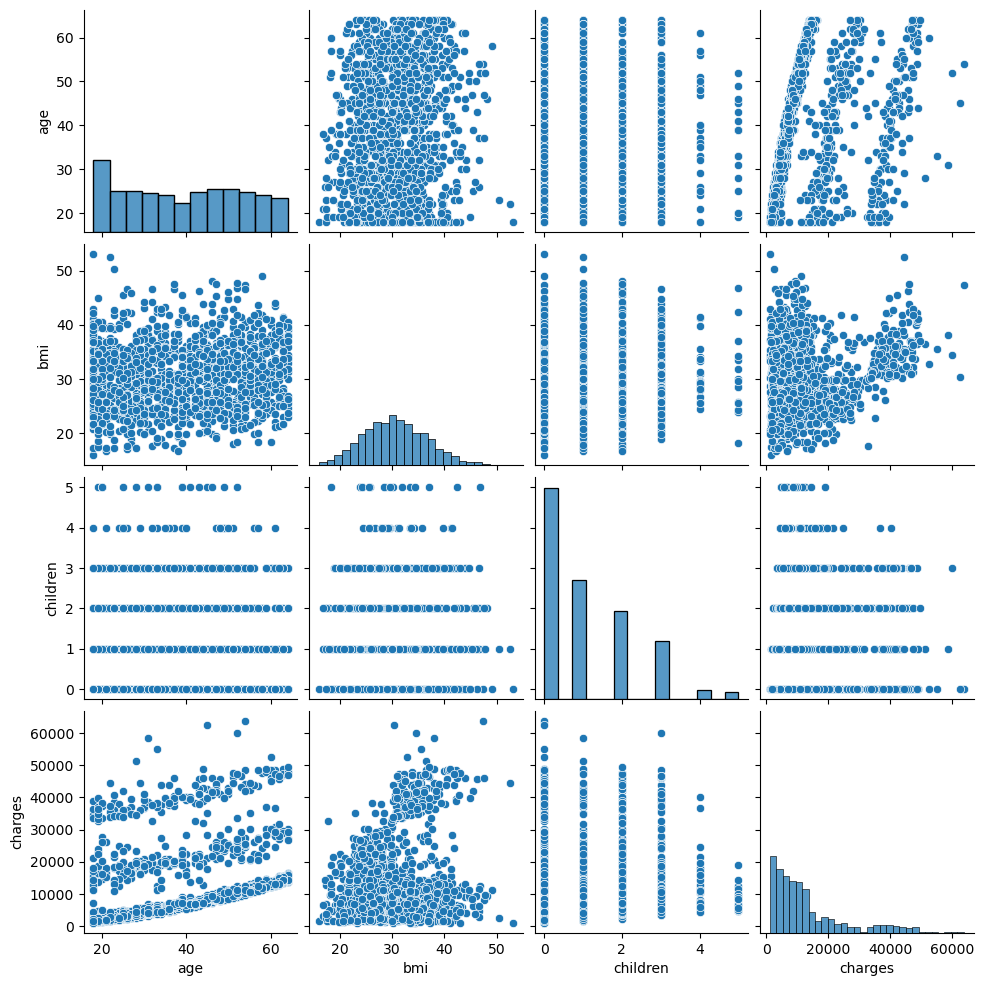

In [15]:
 _=sns.pairplot(data=df, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None, size=None) # data, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None, size=None

### Visualizing the correlation between variables

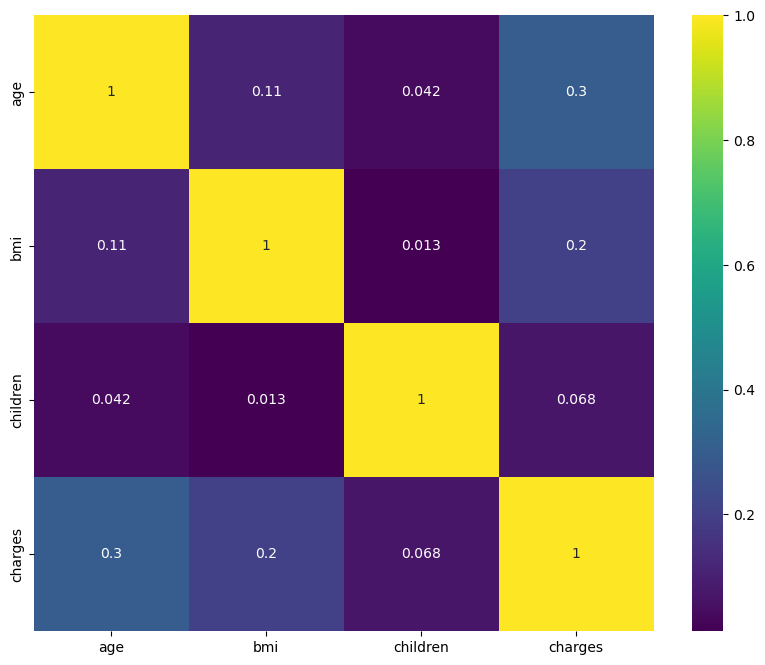

In [16]:
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(data=corr, annot=True,cmap='viridis');

# Conversion:categorical Data into numerical data

In [17]:
## using dummy variables

In [18]:
dummy = pd.get_dummies(df1[['sex', 'smoker', 'region']], columns=['sex', 'smoker', 'region'],drop_first=True)
dummy.head()

sex_male  smoker_yes  region_northwest  region_southeast  region_southwest
0         0           1                 0                 0                 1
1         1           0                 0                 1                 0
2         1           0                 0                 1                 0
3         1           0                 1                 0                 0
4         1           0                 1                 0                 0

In [19]:
df2 = pd.concat([df1,dummy],axis = 1)
df2.head()

age     sex     bmi  children smoker     region  sex_male  smoker_yes  \
0   19  female  27.900         0    yes  southwest         0           1   
1   18    male  33.770         1     no  southeast         1           0   
2   28    male  33.000         3     no  southeast         1           0   
3   33    male  22.705         0     no  northwest         1           0   
4   32    male  28.880         0     no  northwest         1           0   

   region_northwest  region_southeast  region_southwest  
0                 0                 0                 1  
1                 0                 1                 0  
2                 0                 1                 0  
3                 1                 0                 0  
4                 1                 0                 0

In [20]:
df2.isnull().any()

age                 False
sex                 False
bmi                 False
children            False
smoker              False
region              False
sex_male            False
smoker_yes          False
region_northwest    False
region_southeast    False
region_southwest    False
dtype: bool

In [21]:
feature = df2.drop(['sex','smoker','region'],axis = 1)
feature.head()

age     bmi  children  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0         0           1                 0   
1   18  33.770         1         1           0                 0   
2   28  33.000         3         1           0                 0   
3   33  22.705         0         1           0                 1   
4   32  28.880         0         1           0                 1   

   region_southeast  region_southwest  
0                 0                 1  
1                 1                 0  
2                 1                 0  
3                 0                 0  
4                 0                 0

# Model building Setup

In [22]:
# setup the random seed
np.random.seed(306)

In [23]:
feature

age     bmi  children  sex_male  smoker_yes  region_northwest  \
0      19  27.900         0         0           1                 0   
1      18  33.770         1         1           0                 0   
2      28  33.000         3         1           0                 0   
3      33  22.705         0         1           0                 1   
4      32  28.880         0         1           0                 1   
...   ...     ...       ...       ...         ...               ...   
1333   50  30.970         3         1           0                 1   
1334   18  31.920         0         0           0                 0   
1335   18  36.850         0         0           0                 0   
1336   21  25.800         0         0           0                 0   
1337   61  29.070         0         0           1                 1   

      region_southeast  region_southwest  
0                    0                 1  
1                    1                 0  
2                    1                 0  
3                    0                 0  
4                    0                 0  
...                ...               ...  
1333                 0                 0  
1334                 0                 0  
1335                 1                 0  
1336                 0                 1  
1337                 0                 0  

[1338 rows x 8 columns]

In [24]:
# Shuffle and split the data using ShuffleSplit
cv=  ShuffleSplit(n_splits=10,test_size=0.3, random_state=42)

In [25]:
# train test split
train_feature, test_feature, train_label, test_label = train_test_split(
feature,label,random_state=42)

In [26]:
train_feature

age     bmi  children  sex_male  smoker_yes  region_northwest  \
693    24  23.655         0         1           0                 1   
1297   28  26.510         2         0           0                 0   
634    51  39.700         1         1           0                 0   
1022   47  36.080         1         1           1                 0   
178    46  28.900         2         0           0                 0   
...   ...     ...       ...       ...         ...               ...   
1095   18  31.350         4         0           0                 0   
1130   39  23.870         5         0           0                 0   
1294   58  25.175         0         1           0                 0   
860    37  47.600         2         0           1                 0   
1126   55  29.900         0         1           0                 0   

      region_southeast  region_southwest  
693                  0                 0  
1297                 1                 0  
634                  0                 1  
1022                 1                 0  
178                  0                 1  
...                ...               ...  
1095                 0                 0  
1130                 1                 0  
1294                 0                 0  
860                  0                 1  
1126                 0                 1  

[1003 rows x 8 columns]

## Linear regression with normal equation
    Set up pipleline with two stages:
    1. Feature scaling to scale features
    2. Linear regression on the transformed feature matrix
    Throughout this code, following pattern for each estimator will be followed:
    1. Use 'Pipeline' for combining data preprocessing and modeling steps
    2. 'cross_validate' for training the model with 'Shufflesplit' cross validation and 'neg_mean_absolute_error' as scoring matrix
    3. convert the scores to error and report mean absolute errors on the dev set

In [27]:
# Creating the pipe line
lin_reg_pipeline = Pipeline([('feature_scaling',StandardScaler()),
                            ('lin_reg',LinearRegression())])

lin_reg_cv_results = cross_validate(lin_reg_pipeline,
                                   train_feature,
                                   train_label,
                                   cv=cv,
                                   scoring='neg_mean_absolute_error',
                                   return_train_score=True,
                                   return_estimator=True,
                                   error_score='raise')

In [28]:
# to convert negative values of errors into positve values
lin_reg_train_error = -1*lin_reg_cv_results['train_score']
lin_reg_test_error= -1*lin_reg_cv_results['test_score']

In [29]:
print(f'Mean absolute error of linear regression model on the train set:\n'
     f'{lin_reg_train_error.mean():.2f} +/- {lin_reg_train_error.std():.3f}')
print(f'Mean absolute error of linear regression model on the test set:\n'
     f'{lin_reg_test_error.mean():.2f} +/- {lin_reg_test_error.std():.3f}')


Mean absolute error of linear regression model on the train set:
4194.30 +/- 88.958
Mean absolute error of linear regression model on the test set:
4235.17 +/- 139.422


In [56]:
from sklearn.metrics import r2_score
lin_pipeline = Pipeline([('feature_scaling', StandardScaler()), ('lin_reg', LinearRegression())])
lin_pipeline.fit(train_feature, train_label)
train_prediction = lin_pipeline.predict(train_feature)
train_score = r2_score(train_label, train_prediction)





test_prediction=lin_pipeline.predict(test_feature)
test_score = r2_score(test_label,test_prediction)

print('Score on Training Set: ', train_score)

print('Score on Test Set:',test_score)

Score on Training Set:  0.7449555328228536
Score on Test Set: 0.7672642952734356


## Examining the errors related to different transforms

In [43]:
from scipy.stats import zscore
from sklearn.preprocessing import FunctionTransformer
log_transform = FunctionTransformer(np.log1p)
zscore_transform=FunctionTransformer(zscore)
sgd_pipeline = Pipeline([('feature_scaling', StandardScaler()), ('sgd', SGDRegressor(random_state=42,alpha=0))])
sgd_pipeline.fit(train_feature, train_label)  # Model Trained


train_mae = mean_absolute_error(train_label, sgd_pipeline.predict(train_feature))
test_mae = mean_absolute_error(test_label,sgd_pipeline.predict(test_feature))
print('Mean absolute error on Training Set: ', train_mae)
print('Mean absolute error on Test Set:',test_mae)

Mean absolute error on Training Set:  4172.751383021958
Mean absolute error on Test Set: 4229.38201999396


Error Related to Different Transforms:

    log_transform: 
    Mean absolute error on Training Set:  4689
    Mean absolute error on Test Set: 4574
    
    StandardScaler transform:
    Mean absolute error on Training Set:  4172
    Mean absolute error on Test Set: 4229
   
    zscore_transform:
    Mean absolute error on Training Set:  4172
    Mean absolute error on Test Set: 4179





# Hyper parameter tuning using grid search cv

In [32]:

from scipy.stats import zscore
from sklearn.preprocessing import FunctionTransformer
log_transform = FunctionTransformer(np.log1p)
zscore_transform=FunctionTransformer(zscore)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

In [34]:
import warnings
warnings.filterwarnings("ignore")

pipe = Pipeline([('feature_scaling',StandardScaler()),
                             ('estimator',SGDRegressor(warm_start=True, random_state=42))])
 # setting the parameters for GridSearchCV

    


grid_param = [
    {
        'feature_scaling': ['StandardScaler', 'log_transform', 'zscore_transform']
    },
    {
        'estimator': [LinearRegression()],      
    },
    {        'estimator': [SGDRegressor()],
        'estimator__penalty': ['l2', 'l1', 'elasticnet'], # regularization techniques
        'estimator__alpha': [0.0001, 0.001, 0.01, 1], # regularization parameters
        'estimator__max_iter': [1000, 500, 200],
        'estimator__tol': [1e-3], # convergence tolerance
        
        'estimator__eta0': [0.01, 0.001, 0.02], # learning rate
        'estimator__warm_start': [True, False],
        'estimator__random_state': [42]
    }
]






# creating a gridsearch of the pipeline to fit the best model
gridsearch = GridSearchCV(pipe,grid_param,cv=cv,verbose=0)
best_model=  gridsearch.fit(train_feature,train_label)

In [35]:
print(best_model.best_estimator_)

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('estimator',
                 SGDRegressor(alpha=1, eta0=0.001, max_iter=200, penalty='l1',
                              random_state=42, warm_start=True))])


In [36]:
print('the mean accuracy of the model:', best_model.score(test_feature,test_label))

the mean accuracy of the model: 0.7672180198543159


## Gradiant convergence

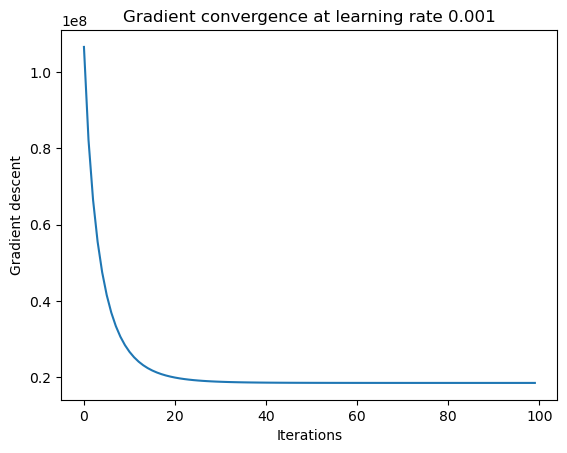

In [44]:
pipe = Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('estimator',
                 SGDRegressor(alpha=1, eta0=0.001, max_iter=200, penalty='l1',
                              random_state=42, warm_start=True))])
sgd = pipe.named_steps['estimator']

scaler = StandardScaler()
epochs = 100
error_list = []
m = train_label.size
train_feature_ss = scaler.fit_transform(train_feature)

for epoch in range(epochs):
    sgd.partial_fit(train_feature_ss, train_label)
    train_predictions = sgd.predict(train_feature_ss)
    sqErrors = (train_predictions - train_label)**2
    J = (1.0 / (2 * m)) * sqErrors
    error_list.append(J)

results = pd.concat(error_list, axis=1)
results.columns = [f"E{i}" for i in range(1, epochs+1)]
results.index = [f"Row {i}" for i in range(1, len(error_list[0])+1)]

# Sum the values in each row of the result DataFrame
row_sums = results.sum(axis=1)

# Add the row sums as a new column to the result DataFrame
results['Total'] = row_sums
error_rate=results.T
dd = error_rate.sum(axis=1)
dd= pd.DataFrame(dd)

# Create an empty DataFrame named "error"
error = pd.DataFrame()

# Assign the result of dd.drop('Total', axis=0) to the "Error" column of the "error" DataFrame
error['Error'] = dd.drop('Total', axis=0)

## Plotting the convergence

plt.plot(np.array(error['Error']))
plt.xlabel('Iterations')
plt.ylabel('Gradient descent')
plt.title('Gradient convergence at learning rate 0.001')
plt.show()

## Training Accuracy and loss

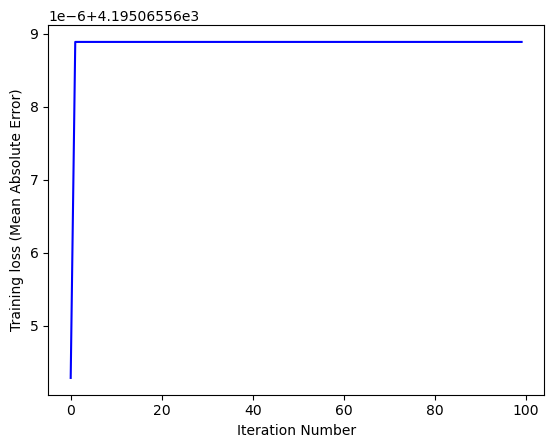

In [51]:

pipe = Pipeline([
    ('feature_scaling', StandardScaler()),
    ('estimator', SGDRegressor(alpha=0.01, eta0=0.02, random_state=42, warm_start=True, verbose=0))
])
loss = []
for epoch in range(100):  # Here we are implementing the pipeline
    model_train = pipe.fit(train_feature,train_label) 
    model_prediction = model_train.predict(train_feature)
    mae = mean_absolute_error(train_label, model_prediction)
    
#     loss = loss.append(mean_squared_error(train_label,sgd_pipeline.predict(train_feature)))
    loss.append(mae)

plt.plot(np.arange(len(loss)),loss,'b-')
plt.xlabel('Iteration Number')
plt.ylabel('Training loss (Mean Absolute Error)')
# plt.title(f'Training loss with learning rate={0.02}')
plt.show()

In [66]:
train_mae = mean_absolute_error(train_label,pipe.predict(train_feature))

print('Mean absolute error on training set',train_mae)

Mean absolute error on training set 4195.065568890576


## Inference Accuracy and Loss

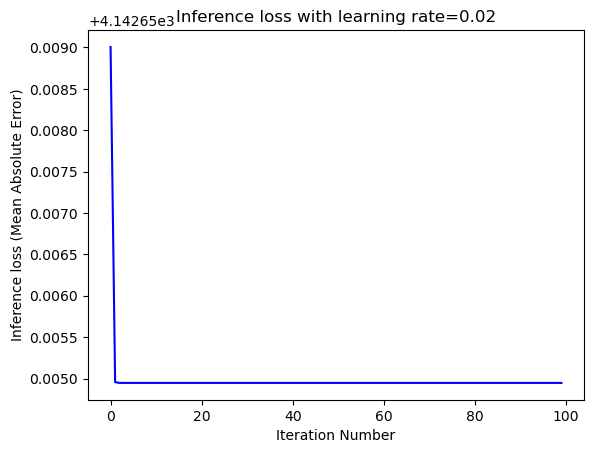

In [40]:
pipe = Pipeline([
    ('feature_scaling', StandardScaler()),
    ('estimator', SGDRegressor(alpha=0.01, eta0=0.02, random_state=42, warm_start=True, verbose=0))
])
loss = []
for epoch in range(100):  # Here we are implementing the pipeline
    model_test = pipe.fit(test_feature,test_label) 
    model_prediction = model_test.predict(test_feature)
    mae = mean_absolute_error(test_label, model_prediction)
    
#     loss = loss.append(mean_squared_error(train_label,sgd_pipeline.predict(train_feature)))
    loss.append(mae)

plt.plot(np.arange(len(loss)),loss,'b-')
plt.xlabel('Iteration Number')
plt.ylabel('Inference loss (Mean Absolute Error)')
plt.title(f'Inference loss with learning rate={0.02}')
plt.show()

In [61]:
# SCore
prediction = pipe.predict(train_feature)
score = r2_score(train_label, train_prediction)





test_prediction=pipe.predict(test_feature)
test_score = r2_score(test_label,test_prediction)

print('Score on Training Set: ', score)

print('Score on Test Set:',test_score)

Score on Training Set:  0.744360596828411
Score on Test Set: 0.7669883338829128


In [64]:
#inference error
test_mae = mean_absolute_error(test_label,pipe.predict(test_feature))

print('Mean absolute error on training set',test_mae)

Mean absolute error on training set 4237.998902118552
